In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
def generate_data(sample_size):
  np.random.seed(42) # data ko fix rkhne k liye
  X = np.random.rand(sample_size,1)*10 # generating x_data
  print(X)
  print()
  y = 3*X + 7 + np.random.rand(sample_size,1)
  return X,y

In [ ]:
def loss_func(y_true, y_pred):
  return np.mean((y_true-y_pred)**2)

In [ ]:
# vanilla GD

def vanilla_GD(X,y,epochs,lr =0.01):
  m,n = X.shape
  X = np.c_[np.ones((m,1), dtype=np.float64),X]
  print(X)
  print()
  theta = np.random.randn(n+1,1)
  print(theta)
  print()
  losses = []

  for epoch in range(epochs):
    pred = X.dot(theta)

    errors = pred - y
    grad = 2/m*X.T.dot(errors)

    theta = theta - lr*grad

    loss = loss_func(y,pred)

    losses.append(loss)
  return theta, losses

In [ ]:
# SGD

def SGD(X,y,epochs,lr=0.01):
  m,n = X.shape
  X = np.c_[np.ones((m, 1), dtype=np.float64), X]
  theta = np.random.randn(n+1,1)
  losses = []


  for epoch in range(epochs):
    random_index = np.random.randint(m)
    xi = X[random_index:random_index+1]
    yi = y[random_index:random_index+1]

    pred = xi.dot(theta)

    errors = pred - yi

    grad = 2*xi.T.dot(errors)

    theta = theta - lr*grad

    loss = loss_func(yi,pred)

    losses.append(loss)

  return theta,losses



In [ ]:
# data generate here

data1 = 10

data2 = 10

X_small,y_small = generate_data(data1)
X_large,y_large = generate_data(data2)

[[3.74540119]
 [9.50714306]
 [7.31993942]
 [5.98658484]
 [1.5601864 ]
 [1.5599452 ]
 [0.58083612]
 [8.66176146]
 [6.01115012]
 [7.08072578]]

[[3.74540119]
 [9.50714306]
 [7.31993942]
 [5.98658484]
 [1.5601864 ]
 [1.5599452 ]
 [0.58083612]
 [8.66176146]
 [6.01115012]
 [7.08072578]]



In [ ]:
start_time = time.time()
# print(start_time)
theta_vanilla_small, losses_vanilla_small = vanilla_GD(X_small,y_small,epochs = 50)
time_vanilla_small = time.time()-start_time
print(time_vanilla_small)
print()

start_time = time.time()
# print(start_time)
theta_vanilla_large,losses_vanilla_large = vanilla_GD(X_small,y_small,epochs = 50)
time_vanilla_large = time.time() -start_time
print(time_vanilla_large)



[[1.         3.74540119]
 [1.         9.50714306]
 [1.         7.31993942]
 [1.         5.98658484]
 [1.         1.5601864 ]
 [1.         1.5599452 ]
 [1.         0.58083612]
 [1.         8.66176146]
 [1.         6.01115012]
 [1.         7.08072578]]

[[-0.21967189]
 [ 0.35711257]]

0.0029633045196533203

[[1.         3.74540119]
 [1.         9.50714306]
 [1.         7.31993942]
 [1.         5.98658484]
 [1.         1.5601864 ]
 [1.         1.5599452 ]
 [1.         0.58083612]
 [1.         8.66176146]
 [1.         6.01115012]
 [1.         7.08072578]]

[[ 1.47789404]
 [-0.51827022]]

0.002002716064453125


In [ ]:
start_time = time.time()
theta_sgd_small, losses_sgd_small = SGD(X_small,y_small,epochs = 50)
time_sgd_small = time.time()-start_time

start_time = time.time()
theta_sgd_large,losses_sgd_large = SGD(X_small,y_small,epochs = 50)
time_sgd_large = time.time() -start_time


In [ ]:
print("vanilla GD (data1/small): Time = {:.4f}s, Final loss = {:.4f}".format(time_vanilla_small,losses_vanilla_small[-1]))
print("vanilla GD (data2/large): Time = {:.4f}s, Final loss = {:.4f}".format(time_vanilla_large,losses_vanilla_large[-1]))
print("SGD (data1/small): Time = {:.4f}s, Final loss = {:.4f}".format(time_sgd_small,losses_sgd_small[-1]))
print("SGD (data2/large): Time = {:.4f}s, Final loss = {:.4f}".format(time_sgd_large,losses_sgd_large[-1]))

vanilla GD (data1/small): Time = 0.0027s, Final loss = 8.7176
vanilla GD (data2/large): Time = 0.0014s, Final loss = 7.9302
SGD (data1/small): Time = 0.0014s, Final loss = 0.5928
SGD (data2/large): Time = 0.0015s, Final loss = 0.0415


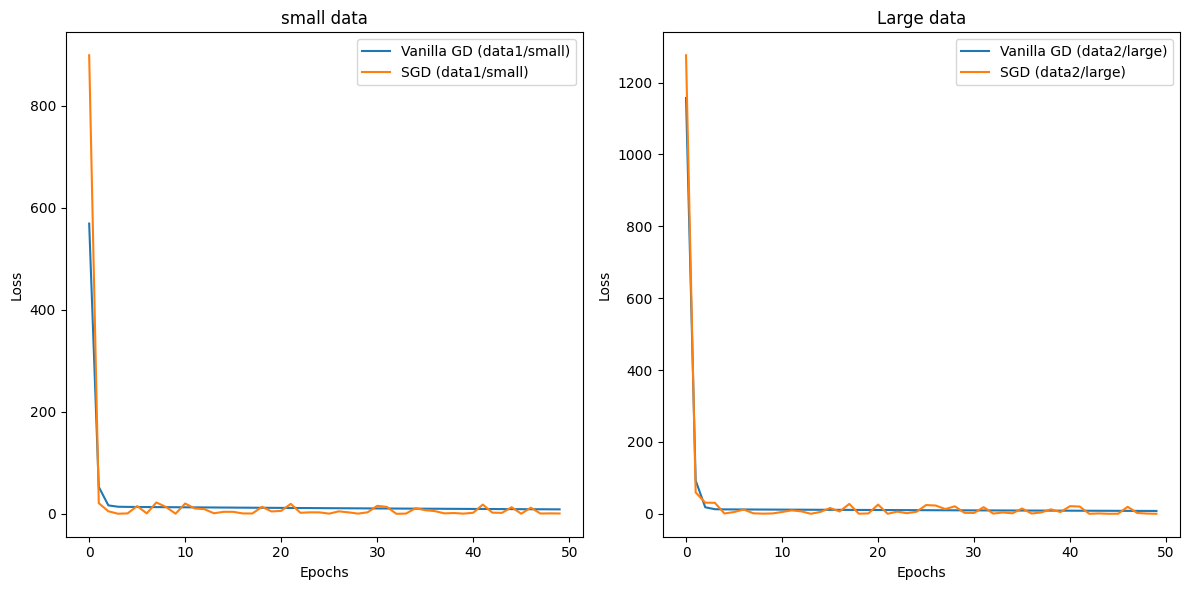

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(losses_vanilla_small,label='Vanilla GD (data1/small)')
plt.plot(losses_sgd_small,label='SGD (data1/small)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("small data")

plt.subplot(1,2,2)
plt.plot(losses_vanilla_large,label='Vanilla GD (data2/large)')
plt.plot(losses_sgd_large,label='SGD (data2/large)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Large data")

plt.tight_layout()
plt.show()
